# Phenotype Phase Plane Analysis Example

In [1]:
import cobra.test
import numpy as np
import pandas as pd
from cobrapy_bigg_client import client
import matplotlib.pyplot as plt
import escher
from escher import Builder
pd.set_option('display.max_rows', 500)

In [2]:
model_orig = client.download_model('e_coli_core', save=False) # Loading the model to the simulation
model_orig.solver = 'glpk'

Set parameter Username
Academic license - for non-commercial use only - expires 2022-10-10


Let's explore the five phase of the glucose-oxygen pheotype phase plane for the *E.coli* core model. Teh interrogation points are shown below.

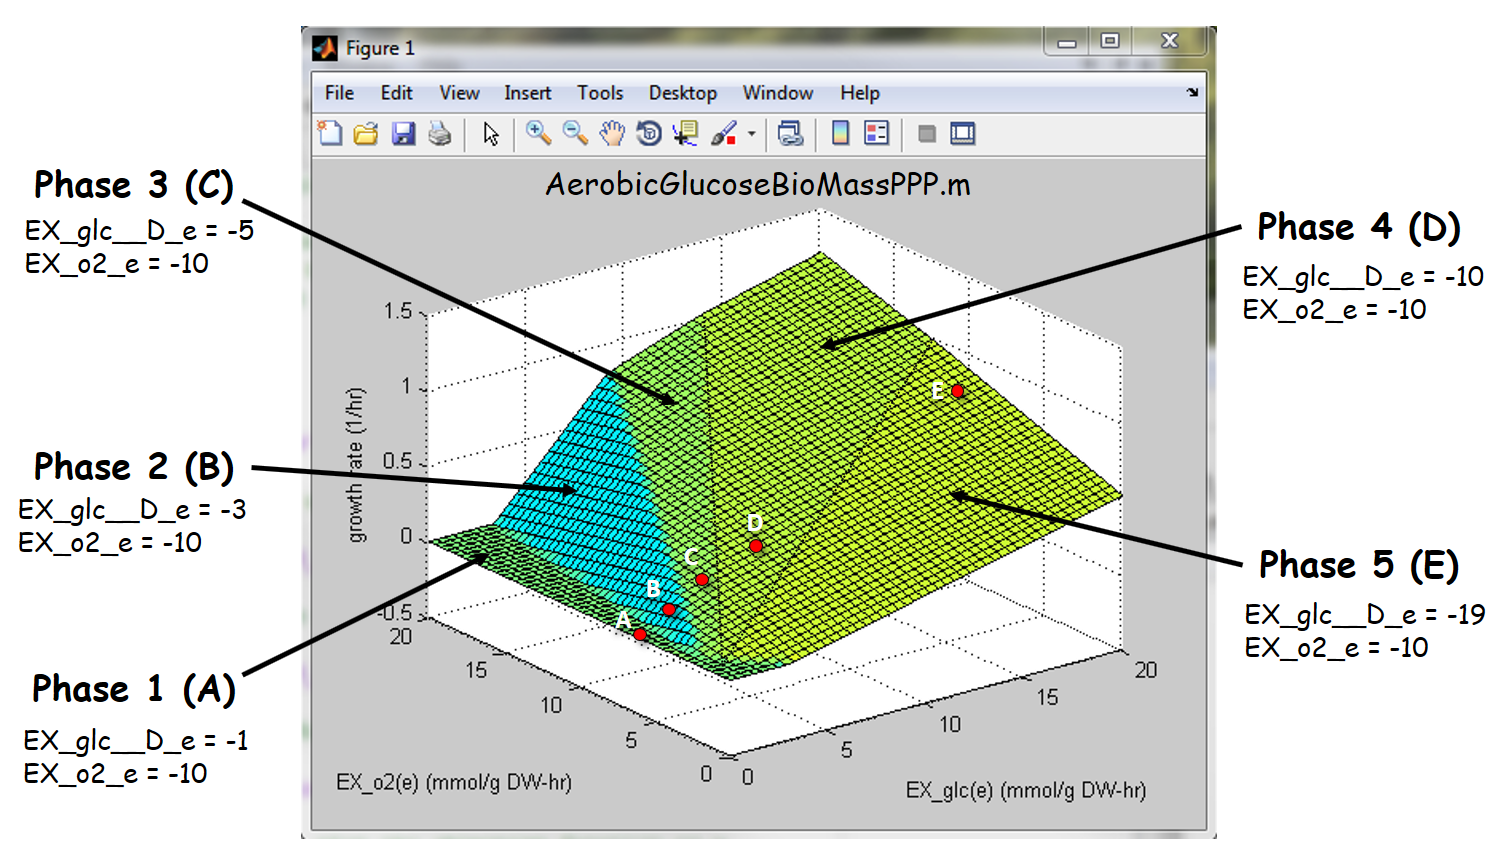

## Phase 1 (EX_glc__D_e = -1;  EX_o2_e = -10)

In [3]:
model_1 = model_orig.copy()

model_1.reactions.EX_glc__D_e.bounds = [-1,-1]
model_1.reactions.EX_o2_e.bounds = [-10,-10]
solution1 = model_1.optimize()
solution1_frame = solution1.to_frame()
solution1_frame.sort_index().round(5)
solution1_frame.fluxes.round(5)

C:\Users\hinton\.conda\envs\Combined\lib\site-packages\cobra\util\solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


PFK                          1.0
PFL                          0.0
PGI                          1.0
PGK                         -2.0
PGL                          0.0
ACALD                        0.0
AKGt2r                       0.0
PGM                         -2.0
PIt2r                        0.0
ALCD2x                       0.0
ACALDt                       0.0
ACKr                         0.0
PPC                          0.0
ACONTa                       2.0
ACONTb                       2.0
ATPM                        15.5
PPCK                         0.0
ACt2r                        0.0
PPS                          0.0
ADK1                         0.0
AKGDH                        0.0
ATPS4r                      13.5
PTAr                         0.0
PYK                          1.0
BIOMASS_Ecoli_core_w_GAM     0.0
PYRt2                        0.0
CO2t                        -6.0
RPE                          0.0
CS                           2.0
RPI                          0.0
SUCCt2_2  

Notice that BIOMASS_Ecoli_core_w_GAM = 0.0 which implies **no growth**. Since there is no growth nothing can be secreted. Looking at the Escher map shows some internal fluxes even though there is no growth.

In [4]:
builder = Builder(map_name='e_coli_core.Core metabolism')
builder.map_json = 'e_coli_core_map.json' # Added local map that includes the FORt reaction
builder

Builder()

In [5]:
builder.reaction_data = solution1.fluxes

Notice that the biomass function in the lower right of the map has no flux flowing through it.

## Phase 2 (EX_glc__D_e = -3;  EX_o2_e = -10)

In [6]:
model2 = model_orig.copy()

model2.reactions.EX_glc__D_e.bounds = [-3,-3]
model2.reactions.EX_o2_e.bounds = [-10,-10]
solution2 = model2.optimize()
solution2_frame = solution2.to_frame()
solution2_frame = solution2_frame.sort_index().round(5)
solution2_frame.fluxes.round(5)

ACALD                        0.00000
ACALDt                       0.00000
ACKr                         0.00000
ACONTa                       3.31705
ACONTb                       3.31705
ACt2r                        0.00000
ADK1                         0.00000
AKGDH                        0.00000
AKGt2r                       0.00000
ALCD2x                       0.00000
ATPM                        14.37131
ATPS4r                      21.57415
BIOMASS_Ecoli_core_w_GAM     0.18302
CO2t                       -10.21159
CS                           3.31705
CYTBD                       20.00000
D_LACt2                      0.00000
ENO                          5.14088
ETOHt2r                      0.00000
EX_ac_e                      0.00000
EX_acald_e                   0.00000
EX_akg_e                     0.00000
EX_co2_e                    10.21159
EX_etoh_e                    0.00000
EX_for_e                     0.00000
EX_fru_e                     0.00000
EX_fum_e                     0.00000
E

The growth in phase 2 is BIOMASS_Ecoli_core_w_GAM = 0.18302. Let's look at the model summary to see what is taken into the cell and what is secreted.

In [7]:
model2.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,3,6,100.00%
nh4_e,EX_nh4_e,0.998,0,0.00%
o2_e,EX_o2_e,10,0,0.00%
pi_e,EX_pi_e,0.6733,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-10.21,1,100.00%
h2o_e,EX_h2o_e,-11.54,0,0.00%
h_e,EX_h_e,-3.671,0,0.00%


Notice that only CO2, water and protons are the only metabolites secreted. In this phase of growth is limited by excess oxygen, since there is not enough glucose to reduce all the oxygen and produce biomass optimally.

Now let's visualize this on an Escher map.

In [8]:
builder2 = Builder(map_name='e_coli_core.Core metabolism')
builder2.map_json = 'e_coli_core_map.json'
builder2

Builder()

In [9]:
builder2.reaction_data = solution2.fluxes

Notice that now there is flux flowing through the biomass function on the lower right of the map.

## Phase 3 (EX_glc__D_e = -5;  EX_o2_e = -10)

In [10]:
model3 = model_orig.copy()

model3.reactions.EX_glc__D_e.bounds = [-5,-5]
model3.reactions.EX_o2_e.bounds = [-10,-10]
solution3 = model3.optimize()
solution3_frame = solution3.to_frame()
solution3_frame = solution3_frame.sort_index().round(5)
solution3_frame.fluxes.round(5)

ACALD                        0.00000
ACALDt                       0.00000
ACKr                        -1.83668
ACONTa                       2.10600
ACONTb                       2.10600
ACt2r                       -1.83668
ADK1                         0.00000
AKGDH                        1.70302
AKGt2r                       0.00000
ALCD2x                       0.00000
ATPM                         8.39000
ATPS4r                      21.50608
BIOMASS_Ecoli_core_w_GAM     0.37351
CO2t                       -10.43181
CS                           2.10600
CYTBD                       20.00000
D_LACt2                      0.00000
ENO                          7.66481
ETOHt2r                      0.00000
EX_ac_e                      1.83668
EX_acald_e                   0.00000
EX_akg_e                     0.00000
EX_co2_e                    10.43181
EX_etoh_e                    0.00000
EX_for_e                     0.00000
EX_fru_e                     0.00000
EX_fum_e                     0.00000
E

The growth in phase 3 is BIOMASS_Ecoli_core_w_GAM = 0.37351. Looking at the model summary.

In [11]:
model3.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,5,6,100.00%
nh4_e,EX_nh4_e,2.037,0,0.00%
o2_e,EX_o2_e,10,0,0.00%
pi_e,EX_pi_e,1.374,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
ac_e,EX_ac_e,-1.837,2,26.04%
co2_e,EX_co2_e,-10.43,1,73.96%
h2o_e,EX_h2o_e,-13.15,0,0.00%
h_e,EX_h_e,-9.329,0,0.00%


Notice that now there is acetate, a fermentation bioproduct, secreted. This occurs becasue there is not enough oxygen to fully oxidize the glucose which results in acetate produced through the fermentation process. This can be seen on the map below.

In [12]:
builder3 = Builder(map_name='e_coli_core.Core metabolism')
builder3.map_json = 'e_coli_core_map.json'
builder3

Builder()

In [13]:
builder3.reaction_data = solution3.fluxes

## Phase 4 (EX_glc__D_e = -10;  EX_o2_e = -10)

In [14]:
model4 = model_orig.copy()

model4.reactions.EX_glc__D_e.bounds = [-10,-10]
model4.reactions.EX_o2_e.bounds = [-10,-10]
solution4 = model4.optimize()
solution4_frame = solution4.to_frame()
solution4_frame = solution4_frame.sort_index().round(5)
solution4_frame.fluxes.round(5)

ACALD                        0.00000
ACALDt                       0.00000
ACKr                        -9.90568
ACONTa                       0.60316
ACONTb                       0.60316
ACt2r                       -9.90568
ADK1                         0.00000
AKGDH                        0.00000
AKGt2r                       0.00000
ALCD2x                       0.00000
ATPM                         8.39000
ATPS4r                      18.80639
BIOMASS_Ecoli_core_w_GAM     0.55905
CO2t                        -4.89467
CS                           0.60316
CYTBD                       20.00000
D_LACt2                      0.00000
ENO                         16.07995
ETOHt2r                      0.00000
EX_ac_e                      9.90568
EX_acald_e                   0.00000
EX_akg_e                     0.00000
EX_co2_e                     4.89467
EX_etoh_e                    0.00000
EX_for_e                    11.50329
EX_fru_e                     0.00000
EX_fum_e                     0.00000
E

The growth in phase 4 is BIOMASS_Ecoli_core_w_GAM = 0.55905. Looking at the model summary.

In [15]:
model4.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
glc__D_e,EX_glc__D_e,10,6,100.00%
nh4_e,EX_nh4_e,3.048,0,0.00%
o2_e,EX_o2_e,10,0,0.00%
pi_e,EX_pi_e,2.057,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
ac_e,EX_ac_e,-9.906,2,54.71%
co2_e,EX_co2_e,-4.895,1,13.52%
for_e,EX_for_e,-11.5,1,31.77%
h2o_e,EX_h2o_e,-8.967,0,0.00%
h_e,EX_h_e,-32.62,0,0.00%


As the glucose increases the number of fermentation products increases there is not enough oxygen to fully oxidize glucose resulting in the formation of both acetate and formate. Looking at the map.

In [16]:
builder4 = Builder(map_name='e_coli_core.Core metabolism')
builder4.map_json = 'e_coli_core_map.json'
builder4

Builder()

In [17]:
builder4.reaction_data = solution4.fluxes

## Phase 5 (EX_glc__D_e = -19;  EX_o2_e = -10)

In [18]:
model5 = model_orig.copy()

model5.reactions.EX_glc__D_e.bounds = [-19,-19]
model5.reactions.EX_o2_e.bounds = [-10,-10]
solution5 = model5.optimize()
solution5_frame = solution5.to_frame()
solution5_frame = solution5_frame.sort_index().round(5)
solution5_frame.fluxes.round(5)

ACALD                       -2.12502
ACALDt                       0.00000
ACKr                       -23.02061
ACONTa                       0.91250
ACONTb                       0.91250
ACt2r                      -23.02061
ADK1                         0.00000
AKGDH                        0.00000
AKGt2r                       0.00000
ALCD2x                      -2.12502
ATPM                         8.39000
ATPS4r                       5.95415
BIOMASS_Ecoli_core_w_GAM     0.84577
CO2t                         1.51113
CS                           0.91250
CYTBD                       20.00000
D_LACt2                      0.00000
ENO                         34.48644
ETOHt2r                     -2.12502
EX_ac_e                     23.02061
EX_acald_e                   0.00000
EX_akg_e                     0.00000
EX_co2_e                    -1.51113
EX_etoh_e                    2.12502
EX_for_e                    29.22789
EX_fru_e                     0.00000
EX_fum_e                     0.00000
E

The growth in phase 5 is BIOMASS_Ecoli_core_w_GAM = 0.84577. Let's see what is being secreted in phase 5.

In [19]:
model5.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,1.511,1,1.31%
glc__D_e,EX_glc__D_e,19,6,98.69%
nh4_e,EX_nh4_e,4.612,0,0.00%
o2_e,EX_o2_e,10,0,0.00%
pi_e,EX_pi_e,3.111,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
ac_e,EX_ac_e,-23.02,2,57.90%
etoh_e,EX_etoh_e,-2.125,2,5.34%
for_e,EX_for_e,-29.23,1,36.76%
h2o_e,EX_h2o_e,-2.525,0,0.00%


As the glucose increases there is not enough oxygen to fully oxidize the increased glucose which results in the increased number of fermentation products, now including acetate, formate and ethanol. Looking at the map.

In [20]:
builder5 = Builder(map_name='e_coli_core.Core metabolism')
builder5.map_json = 'e_coli_core_map.json'
builder5

Builder()

In [21]:
builder5.reaction_data = solution5.fluxes

Putting all this together we can see the different phase plans for glucose and oxygen in the *E.coli* core model.

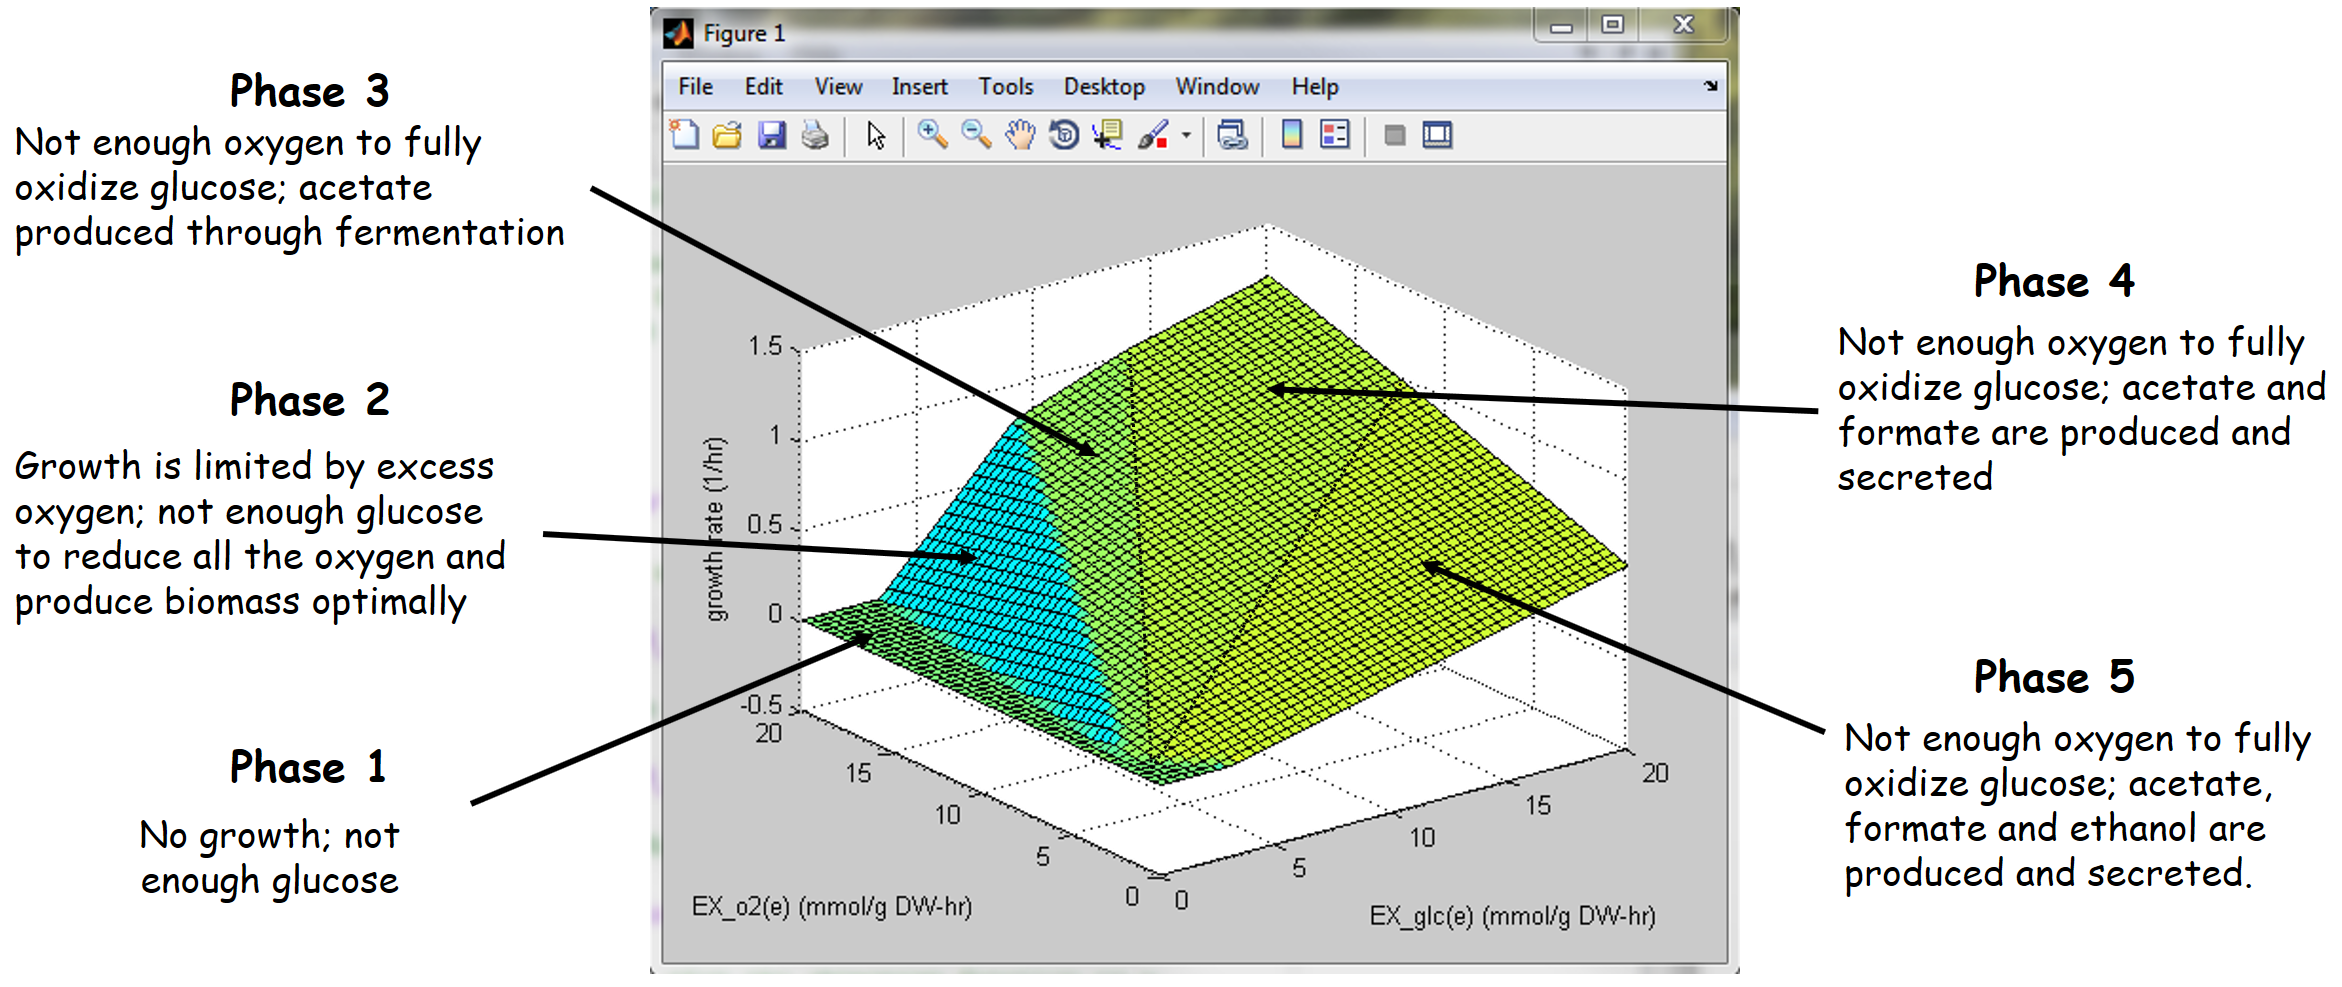

## Multi-dimensional plot
Multi-dimensional plotting is not currently supported supported in COBRApy or Cameo, below is a custom matplotlib plot.

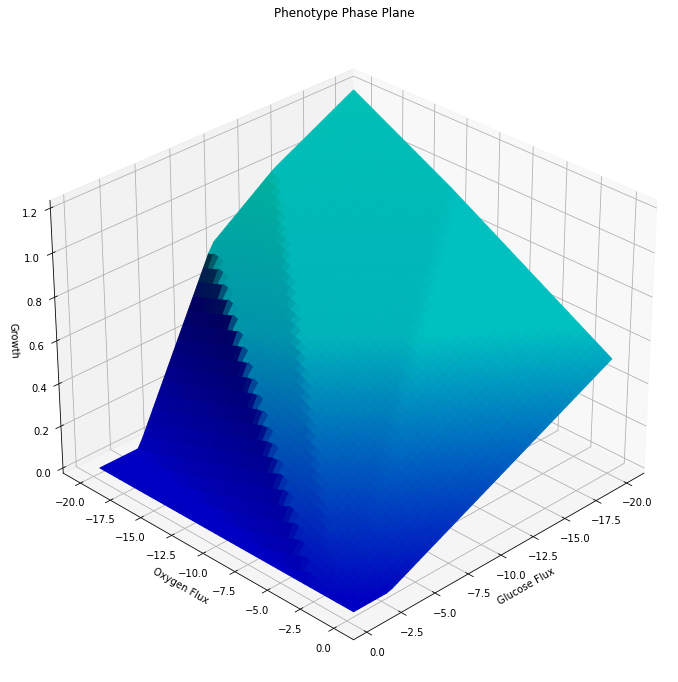

In [22]:
from cameo import models
from cameo import phenotypic_phase_plane

from mpl_toolkits import mplot3d 
import numpy as np 
import matplotlib.pyplot as plt 

from matplotlib.colors import LightSource
from matplotlib import cm

model = model_orig.copy()
model.reactions.EX_o2_e.lower_bound = -20
model.reactions.EX_glc__D_e.lower_bound = -20

result_3D = phenotypic_phase_plane(model, variables=[model.reactions.EX_glc__D_e, model.reactions.EX_o2_e], 
                                   objective=model.reactions.BIOMASS_Ecoli_core_w_GAM, points=50)
result_3D.data_frame


points = 50
Z = np.zeros((points, points))
X = np.zeros((points, points))
Y = np.zeros((points, points))
for i in range(len(result_3D.data_frame.objective_upper_bound.values)):
    p,q = divmod(i, points)
    p,q
    Z[q,p] = result_3D.data_frame.objective_upper_bound.values[i]

Z[np.isnan(Z)] = 0   # Convert NAN's to zero's
x = result_3D.data_frame.EX_glc__D_e.values[0:points*points:points]
y = result_3D.data_frame.EX_o2_e.values[:points]

X, Y = np.meshgrid(x, y)

light = LightSource(180, 0)
#illuminated_surface = light.shade(Z, cmap=cm.coolwarm)
illuminated_surface = light.shade(Z, cmap=cm.winter)

fig = plt.figure(figsize =(12, 12)) 
ax = plt.axes(projection ='3d')

ax.view_init(30,45) # Change viewing angle
ax.set_title('Phenotype Phase Plane') 
ax.set_xlabel('Glucose Flux')
ax.set_ylabel('Oxygen Flux')
ax.set_zlabel('Growth')

ax.plot_surface(X, Y, Z,facecolors=illuminated_surface)
plt.show()

## References

1. Orth, J. D., I. Thiele, et al. (2010). "What is flux balance analysis?" Supplementary Tutorial, Nature biotechnology 28(3): 245-248. (Supplementary Examples 4 & 5) 